### Linear refression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split

In [2]:
path = os.getcwd() + '/data.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [3]:
def computeCost(X, y, theta):
    m = y.shape[1]
    S = np.sum(np.power(theta*X - y, 2))
    return S/(2*m)

In [4]:
def gradient_prosty(X, y, theta, alpha, it):
    m = y.shape[1]
    cost = computeCost(X, y, theta)
    cost_lst = [cost]
    min_cost = cost
    theta_optimal = theta
    for i in range(it):
        theta[0, 0] = theta[0, 0] - (alpha/m) * np.sum(theta * X - y)
        theta[0, 1] = theta[0, 1] - (alpha/m) * np.sum((theta * X - y) * np.transpose(X))
        cost = computeCost(X, y, theta)
        cost_lst.append(cost)
        if cost < min_cost:
            min_cost = cost
            theta_optimal = theta
    theta = theta_optimal
    cost = min_cost
    return theta, cost, cost_lst

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


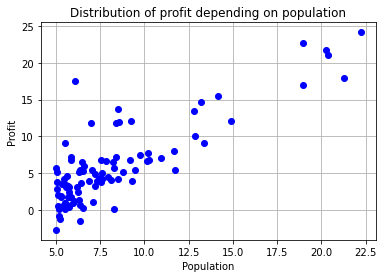

In [7]:
plt.figure()
plt.plot('Population', 'Profit', 'bo', data=data)
plt.title('Distribution of profit depending on population')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [8]:
data.insert(0, 'Ones', 1)
X = [data['Ones'], data['Population']]
y = data['Profit']

In [9]:
X = np.matrix(X)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]), dtype=float)

In [10]:
computeCost(X, y, theta)

32.072733877455676

In [11]:
alpha = 0.01
it = 1000

In [12]:
theta, cost, cost_lst = gradient_prosty(X, y, theta, alpha, it)

In [13]:
theta

matrix([[-3.13719865,  1.11543748]])

In [14]:
cost

4.529457259097518

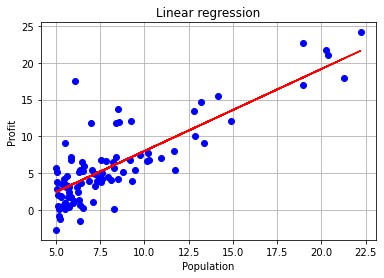

In [15]:
plt.figure()
plt.plot('Population', 'Profit', 'bo', data=data)
x = data['Population']
plt.plot(x, theta[0, 1]*x + theta[0, 0], '-r')
plt.title('Linear regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

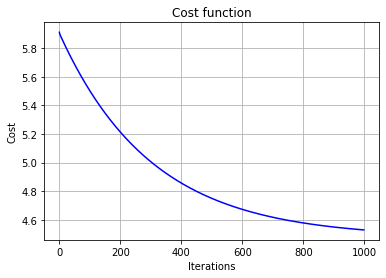

In [16]:
cost_lst = np.delete(cost_lst, [[0]])
plt.figure()
plt.plot(cost_lst[1:], '-b')
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [17]:
path = os.getcwd() + '/data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
norm_data2 = (data2-data2.mean())/data2.std()

In [19]:
norm_data2.insert(0, 'Ones', 1)
X = [norm_data2['Ones'], norm_data2['Size'], norm_data2['Bedrooms']]
y = data2['Price']

In [20]:
X = np.matrix(X)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0, 0]), dtype=float)

In [21]:
computeCost(X, y, theta)

65591548106.45744

In [22]:
theta, cost, cost_lst = gradient_prosty(X, y, theta, alpha, it)

In [23]:
theta

matrix([[340397.96353532, 104009.04035572,      0.        ]])

In [24]:
cost

2059164513.1507108

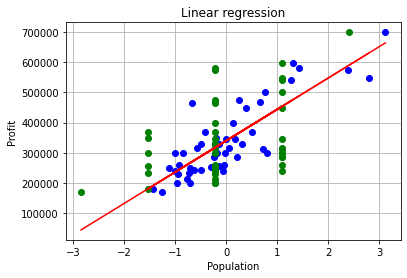

In [25]:
plt.figure()
plt.plot(norm_data2['Size'], data2['Price'], 'bo')
plt.plot(norm_data2['Bedrooms'], data2['Price'], 'go')
x = [norm_data2['Size'], norm_data2['Bedrooms']]
x = np.matrix(x)
plt.plot(x, theta[0, 1]*x + theta[0, 0], '-r')
plt.title('Linear regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

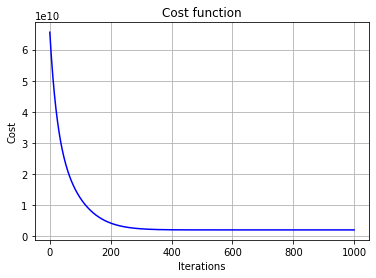

In [26]:
plt.figure()
plt.plot(cost_lst, '-b')
plt.title('Zaleznosc wartosci funkcji kosztu od iteracji')
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [27]:
boston = datasets.load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [28]:
boston_X = boston.data
boston_Y = boston.target

In [29]:
norm_boston = (boston_X-boston_X.mean())/boston_X.std()

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size=0.2) #, random_state=) # Podział na zbiór treningowy i testowy (70-30%)

In [31]:
reg_LinReg = linm.LinearRegression()
reg_Ridge = linm.Ridge(alpha = .5)
reg_Lasso = linm.Lasso(alpha = 5.1)
reg_ElNet = linm.ElasticNet(alpha = .5, l1_ratio=0.5)

In [32]:
reg_LinReg.fit(X_train, Y_train)
Y_predicted = reg_LinReg.predict(X_test)

In [33]:
reg_LinReg.coef_

array([-1.26839615e-01,  6.19271568e-02, -3.02585866e-02,  3.23187860e+00,
       -1.78593820e+01,  3.42047529e+00,  2.35919428e-03, -1.65766561e+00,
        3.19266776e-01, -1.24014424e-02, -9.21544378e-01,  6.43664895e-03,
       -5.36208848e-01])

In [34]:
error = np.mean((Y_predicted - Y_test) ** 2)
error

25.402957697259954

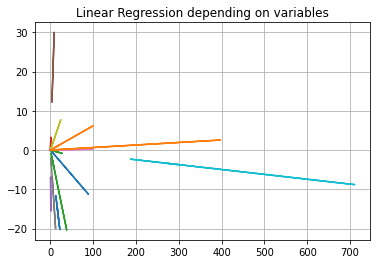

In [35]:
plt.figure()
plt.plot(boston_X, reg_LinReg.coef_*boston_X)
plt.title('Linear Regression depending on variables')
plt.grid(True)
plt.show()

In [36]:
reg_Ridge.fit(X_train, Y_train)
Y_predicted = reg_Ridge.predict(X_test)

In [37]:
reg_Ridge.coef_

array([-1.24728756e-01,  6.27520078e-02, -4.99759593e-02,  3.09938258e+00,
       -1.26757419e+01,  3.45511668e+00, -2.36875981e-03, -1.57975319e+00,
        3.09313684e-01, -1.29202810e-02, -8.64363750e-01,  6.70942271e-03,
       -5.42638394e-01])

In [38]:
error = np.mean((Y_predicted - Y_test) ** 2)
error

25.454753563669012

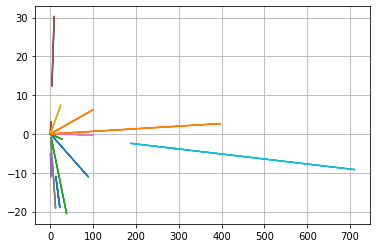

In [39]:
plt.figure()
plt.plot(boston_X, reg_Ridge.coef_*boston_X)
plt.grid(True)


In [40]:
reg_Lasso.fit(X_train, Y_train)
Y_predicted = reg_Lasso.predict(X_test)

In [41]:
reg_Lasso.coef_

array([-0.        ,  0.05879639, -0.        ,  0.        ,  0.        ,
        0.        ,  0.03103088, -0.        ,  0.        , -0.00751344,
       -0.        ,  0.0048522 , -0.72626692])

In [42]:
error = np.mean((Y_predicted - Y_test) ** 2)
error

39.551215921014816

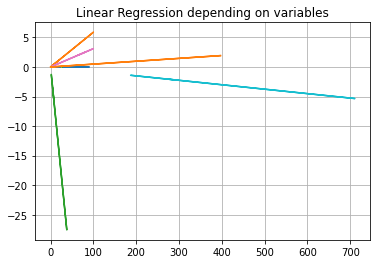

In [43]:
plt.figure()
plt.plot(boston_X, reg_Lasso.coef_*boston_X)
plt.title('Linear Regression depending on variables')
plt.grid(True)


In [44]:
reg_ElNet.fit(X_train, Y_train)
Y_predicted = reg_ElNet.predict(X_test)

In [45]:
reg_ElNet.coef_

array([-0.11091836,  0.07162932, -0.06811893,  0.        , -0.        ,
        1.54185867,  0.00982626, -1.14214457,  0.32741119, -0.01664496,
       -0.78760111,  0.0067264 , -0.69513375])

In [46]:
error = np.mean((Y_predicted - Y_test) ** 2)
error

28.6650416384371

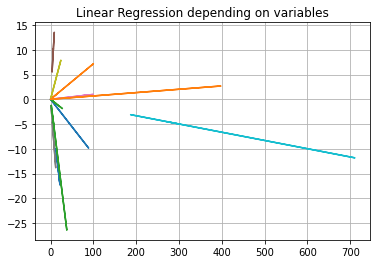

In [47]:
plt.figure()
plt.plot(boston_X, reg_ElNet.coef_*boston_X)
plt.title('Linear Regression depending on variables')
plt.grid(1)
plt.show()